In [ ]:
# Importando librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [75]:
df = pd.read_csv("loan.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Limpieza de Datos

### Descartando Columnas
Con la siguiente funcion descartamos aquellas columnas que consideramos no aportan 
información para el otorgamiento de un pŕestamo a un cliente.

Se declara una funcion, la cual recibe una lista de columnas a eliminar y un dataframe

In [76]:
def eliminaColumns(columnas, df):
    for column in columnas:
        del df[column]

### Llamado de la funcion
A continuacion definimos una lista con las columnas a elimar. Llamamos a la funcion, pasamos la lista y el dataframe

In [77]:
columnas=['id','member_id','url','desc','verification_status_joint','funded_amnt_inv','int_rate', 
          'grade', 'sub_grade', 'issue_d','pymnt_plan', 'purpose', 'title', 
          'zip_code', 'addr_state', 'dti','earliest_cr_line', 'inq_last_6mths', 
          'pub_rec', 'initial_list_status','out_prncp', 'out_prncp_inv', 
          'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 
          'collection_recovery_fee','next_pymnt_d', 
          'mths_since_last_major_derog',
          'collections_12_mths_ex_med',
          'last_credit_pull_d', 
          'policy_code']

eliminaColumns(columnas, df)

###  Descartando columnas  que el 10% de sus valores son nulos
Se ejecuta un ciclo for, el cual recorre las columnas del dataframe, dentro del ciclo se toma una decision de si los registros cumplen con el 10% de los valores nulos la columna se descarta.

In [78]:
for i in df.columns:
    if df[i].count()< 798641:
          del df[i]


### Comprueba que las columnas se eliminaron

In [79]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

### Generando variables indicadoras de las columnas 
La columna 'term' es una variable categórica binaria con dos categorías '36 months' y '60 months', se decidió convertirla a númerica: 0(para 36) y 1(para 60).
Se hace un diccionario para mapear en la columna 'term 'los valores que se van a reemplazar por los enteros.

In [80]:
mymap={' 36 months':0, ' 60 months':1}

Después se aplica la función .apply a la columna 'term' donde se aplica otra funcion que toma el diccionario creado para hacer la sustitución en la columna.

In [81]:
df['term'] = df['term'].apply(lambda s: mymap[s])

Se comprueban los nuevos valores

In [82]:
df['term'][:10]

0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: term, dtype: int64

Se checan los valores unicos de la columna 'emp_length' para sustituirlos. 

In [83]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

Se hace un diccionario para mapear los valores a sustituir. El valor 'n/a' se sustituyó por None. En la imputación se debe decidir que valor dejar ahí.  

In [84]:
mydict={'< 1 year':0., '1 year':1., '2 years':2., '3 years':3., '4 years':4., '5 years':5., '6 years':6., '7 years':7., '8 years':8., '9 years':9., '10+ years':10., 'n/a':None}

Se aplica la función .apply con los valores de mydict a la columna 'emp_length'

In [85]:
df['emp_length'] = df['emp_length'].apply(lambda s: mydict[s])

Se comprueba que el tipo de dato de la columna ha cambiado.

In [86]:
df['emp_length'].describe()

count    842554.000000
mean          6.008695
std           3.666155
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

### Funcion para generar variables indicadoras
La siguiente funcion sustituye los valores de home_ownership, verification_status, loan_status y application_type.

In [87]:
def transformData(df):
    df['home_ownership'].replace('OWN', 0,inplace=True)
    df['home_ownership'].replace('RENT', 1,inplace=True)
    df['home_ownership'].replace('MORTGAGE', 2,inplace=True)
    df['home_ownership'].replace('OTHER', 3,inplace=True)
    df['home_ownership'].replace('NONE', 4,inplace=True)
    df['home_ownership'].replace('ANY', 5,inplace=True)
    print(df['home_ownership'].unique())
    
    df['verification_status'].replace('Verified', 0, inplace=True)
    df['verification_status'].replace('Source Verified', 1, inplace=True)
    df['verification_status'].replace('Not Verified', 2, inplace=True)
    print(df['verification_status'].unique())
    
    df['loan_status'].replace('Fully Paid', 0, inplace=True)
    df['loan_status'].replace('Charged Off', 1, inplace=True)
    df['loan_status'].replace('Current', 2, inplace=True)
    df['loan_status'].replace('Default', 3, inplace=True)
    df['loan_status'].replace('Late (31-120 days)', 4, inplace=True)
    df['loan_status'].replace('In Grace Period', 5, inplace=True)
    df['loan_status'].replace('Late (16-30 days)', 6, inplace=True)
    df['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 7, inplace=True)
    df['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 8, inplace=True)
    df['loan_status'].replace('Issued', 9,inplace=True)
    print(df['loan_status'].unique())
    
    df['application_type'].replace('INDIVIDUAL', 0, inplace=True)
    df['application_type'].replace('JOINT', 1, inplace=True)
    print(df['application_type'].unique())
      
        
transformData(df)

[1 0 2 3 4 5]
[0 1 2]
[0 1 2 3 4 5 6 7 8 9]
[0 1]


## Graficas de las distribuciones de las variables.

##### Gráfica de los estatus de los préstamos


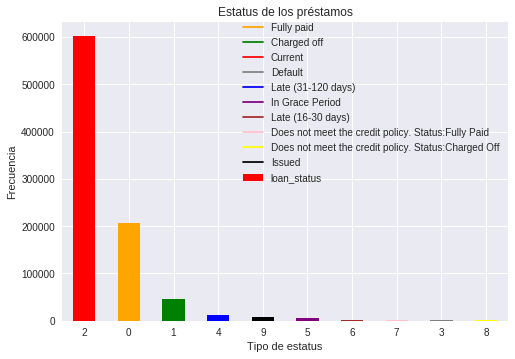

In [88]:
loan_status_counts=df['loan_status'].value_counts()
loan_status_counts.plot(kind='bar',
                        title='Estatus de los préstamos',
                        color=['red','orange','green','blue', 
                        'black', 'purple', 'brown','pink','gray','yellow']
                        )
plt.xlabel('Tipo de estatus')
plt.ylabel('Frecuencia')
plt.xticks((0,1,2,3,4,5,6,7,8,9),(2,0,1,4,9,5,6,7,3,8), rotation=0)
plt.plot((),label='Fully paid', color='orange')
plt.plot((),label='Charged off', color='green')
plt.plot((),label='Current', color='red')
plt.plot((),label='Default', color='gray')
plt.plot((),label='Late (31-120 days)',color='blue')
plt.plot((),label='In Grace Period', color='purple')
plt.plot((),label='Late (16-30 days)', color='brown')
plt.plot((),label='Does not meet the credit policy. Status:Fully Paid', color='pink') 
plt.plot((),label='Does not meet the credit policy. Status:Charged Off', color='yellow' )
plt.plot((),label='Issued', color='black')

plt.legend(bbox_to_anchor=(0.9, 0.9),
    ncol=1,bbox_transform=plt.gcf().transFigure)


plt.show()

In [89]:
df['emp_length'].describe()


count    842554.000000
mean          6.008695
std           3.666155
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

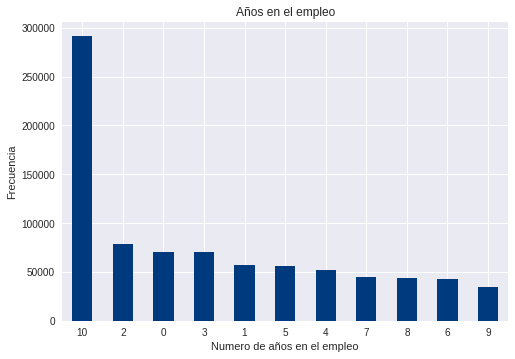

In [90]:
emp_lenght_counts=df['emp_length'].value_counts()
emp_lenght_counts.plot(kind='bar', color='#003A7E')
plt.xlabel('Numero de años en el empleo')
plt.ylabel('Frecuencia')
plt.title('Años en el empleo')
plt.xticks((0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0),(10,2,0,3,1,5,4,7,8,6,9), rotation=0)
plt.show()

In [64]:
df['term'].value_counts()

0    621125
1    266254
Name: term, dtype: int64

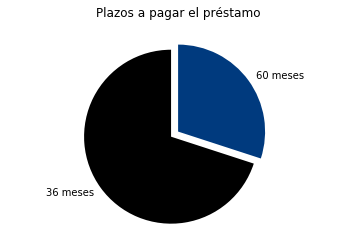

In [19]:
#term_counts=df['term']
#.plot(kind='pie', title=)

labels='36 meses','60 meses'
sizes=[621125,266254]
colors=['black', '#003A7E']
plt.axis('equal')
explode=[0.1,0]
plt.title('Plazos a pagar el préstamo')
plt.pie(#title='Plazos a pagar el préstamo',
        sizes,explode=explode,labels=labels,
         colors=colors, startangle=90)
#term_counts.plot(label='36 meses')
#plot.xlabel('Meses')
#plot.ylabel('Frecuencia')
#plot.xticks((0,1),('36', '60'), rotation=0 )
plt.show()

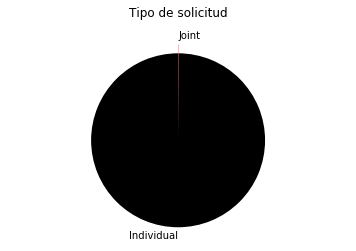

In [20]:
df['application_type'].value_counts()
labels='Individual','Joint'
sizes=[886868,511]
colors=['black', 'red']
plt.axis('equal')
explode=[0.1,0]
plt.title('Tipo de solicitud')
plt.pie(#title='Plazos a pagar el préstamo',
        sizes,explode=explode,labels=labels,
         colors=colors, startangle=90)
plt.show()

In [21]:
df['application_type'].value_counts()

0    886868
1       511
Name: application_type, dtype: int64

In [22]:
df['verification_status'].value_counts()

1    329558
0    291071
2    266750
Name: verification_status, dtype: int64

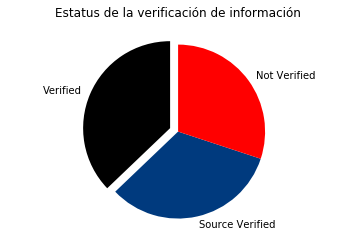

In [23]:
labels='Verified','Source Verified', 'Not Verified'
sizes=[329558,291071,266750]
colors=['black', '#003A7E', 'red']
plt.axis('equal')
explode=[0.1,0,0]
plt.title('Estatus de la verificación de información')
plt.pie(#title='Plazos a pagar el préstamo',
        sizes,explode=explode,labels=labels,
         colors=colors, startangle=90)
plt.show()

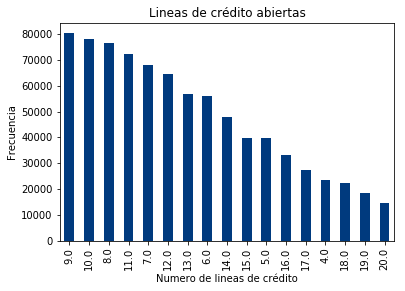

In [24]:
#df['open_acc'].describe()
open_acc_count=df['open_acc'].value_counts()
open_acc_count[:20].plot(kind='bar', title= 'Lineas de crédito abiertas', color='#003A7E')
plt.xlabel("Numero de lineas de crédito")
#plot.xticks((),rotation=0)
plt.ylabel('Frecuencia')
plt.show()

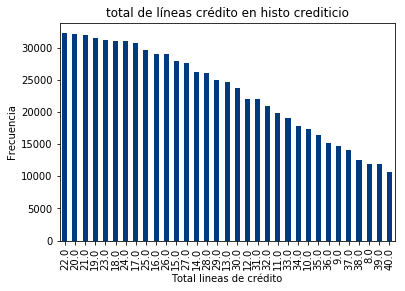

In [25]:
open_acc_count=df['total_acc'].value_counts()
open_acc_count[:40].plot(kind='bar', title= 'total de líneas crédito en histo crediticio', color='#003A7E')
plt.xlabel("Total lineas de crédito")
plt.ylabel('Frecuencia')
plt.show()

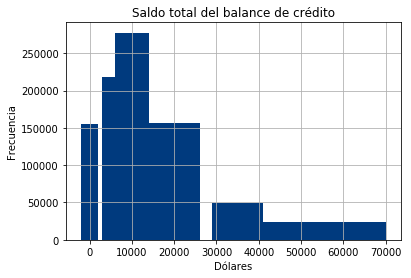

In [26]:
#isnull()).sum())
#pd.options.display.float_format = '{:,.0f}'.format
revol_util=df['revol_bal']
revol_util.hist(bins=[0,5000,10000,20000,35000,50000,100000], rwidth=0.8, align='left', color='#003A7E')
plt.title('Saldo total del balance de crédito')
plt.ylabel('Frecuencia')
plt.xlabel('Dólares')
plt.show()

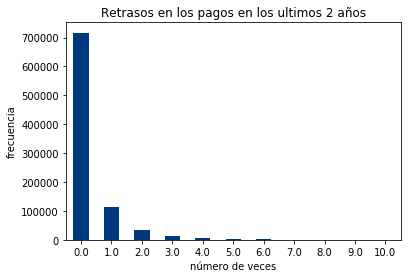

In [27]:
delinq_2yrs_counts=df['delinq_2yrs'].value_counts()[:10]
delinq_2yrs_counts.plot(kind='bar',title="Retrasos en los pagos en los ultimos 2 años", color='#003A7E')
plt.xlabel('número de veces')
plt.ylabel('frecuencia')
plt.xticks((0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0),(0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0),rotation=0)
plt.show()

In [28]:
print((df['delinq_2yrs'].isnull()).sum())

29


#### Grafica de la cantidad de los prestamos

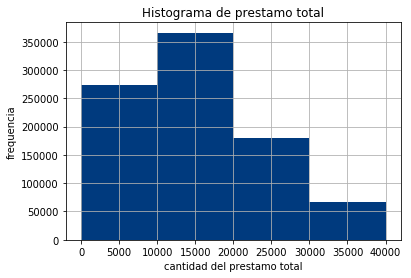

In [29]:
data = df['loan_amnt']
data.hist(bins=[0,10000,20000,30000,40000],color='#003A7E')
data.describe()
plt.ylabel('frequencia')
plt.xlabel('cantidad del prestamo total')
plt.title('Histograma de prestamo total')
plt.show()

#### Grafica de los pagos mensuales

In [30]:
df['installment'].describe()


count    887379.000000
mean        436.717127
std         244.186593
min          15.670000
25%         260.705000
50%         382.550000
75%         572.600000
max        1445.460000
Name: installment, dtype: float64

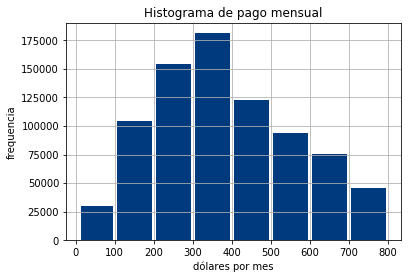

In [31]:
installment = df['installment']
#rango = max(df['installment']) - min(df['installment'])
#count_install = df['installment'].unique()
installment.hist(bins=[10,100,200,300,400,500,600,700,800],rwidth=.9,color='#003A7E')
plt.ylabel('frequencia')
plt.xlabel('dólares por mes')
plt.title('Histograma de pago mensual')
plt.show()


#### Grafica de los ingresos anuales

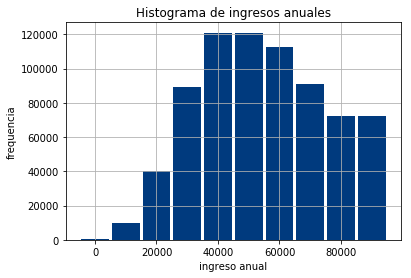

In [32]:
annual_inc = df['annual_inc']
annual_inc.hist(bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000], rwidth=.9, align='left',color='#003A7E')
plt.ylabel('frequencia')
plt.xlabel('ingreso anual')
plt.title('Histograma de ingresos anuales')
plt.show()

#### Grafica de tipo de propiedad

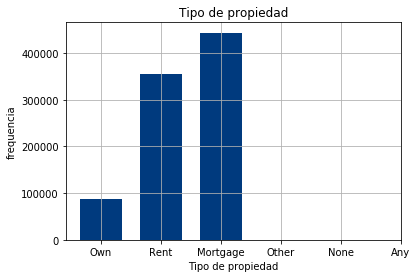

In [33]:
home_owner = df['home_ownership']
names=['Own','Rent','Mortgage','Other','None','Any']
binsH=[0,1,2,3,4,5]
width=5

home_owner.hist(bins=binsH, rwidth=.7, align='left',color='#003A7E')
plt.xticks([0,1, 2, 3,4,5], names)
plt.ylabel('frequencia')
plt.xlabel('Tipo de propiedad')
plt.title('Tipo de propiedad')
#pl.legend()
plt.show()

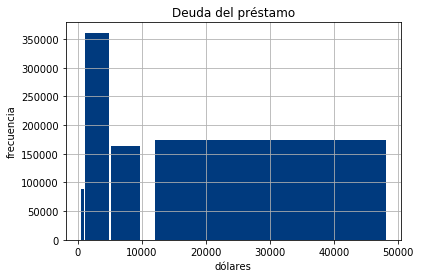

In [34]:
recoveries=df['total_rec_prncp']
recoveries.hist(bins=[500,1000,5000,10000,50000], rwidth=0.9, color='#003A7E')
plt.title('Deuda del préstamo')
plt.xlabel('dólares')
plt.ylabel('frecuencia')
plt.show()

# MATRIZ DE CORRELACIÓN
### Importando librerias necesarias

In [21]:
import seaborn as sns
from scipy import stats 

### Eliminando Columnas de tipo string

In [92]:
def delcolobjet(df):
    for i in df.columns:
        if df[i].dtype == np.object:
            del df[i]
    return df

In [93]:
delcolobjet(df)[:2]

,loan_amnt,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,delinq_2yrs,...,total_acc,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,0,162.87,10.0,1,24000.0,0,0,0.0,...,9.0,5000.00,0.0,0.00,171.62,0,0.0,NaN,NaN,NaN
1,2500.0,2500.0,1,59.83,0.0,1,30000.0,1,1,0.0,...,4.0,456.46,0.0,117.08,119.66,0,0.0,NaN,NaN,NaN


### Calculando matriz de Correlación

In [39]:
corr = df.corr()

### Generando HeatMap

In [40]:
sns.heatmap(corr,square=True)

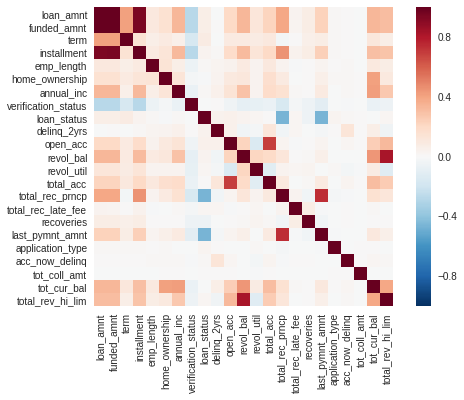

In [41]:
plt.show()

# Generando Gráficas de caja y bigotes

In [53]:
df.boxplot(column="loan_amnt", sym = 'b.', whis=1.5)

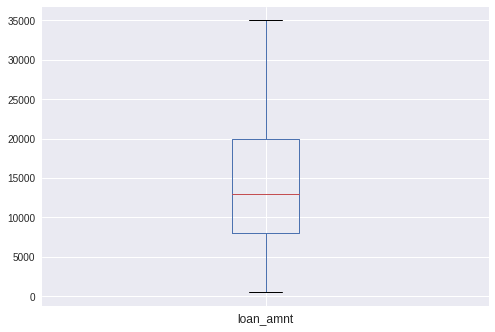

In [54]:
plt.show()

In [55]:
plt.close()

In [56]:
df.boxplot(column="installment", sym = 'b.', whis=1.5)

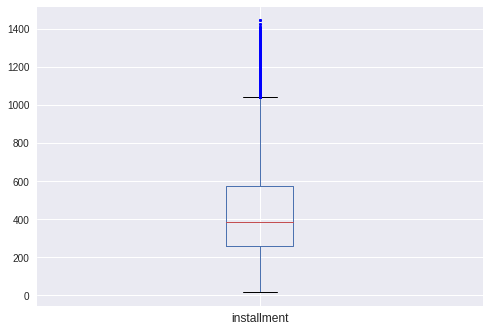

In [57]:
plt.show()

In [58]:
plt.close()

In [59]:
df.boxplot(column="recoveries", sym = 'b.', whis=1.5)

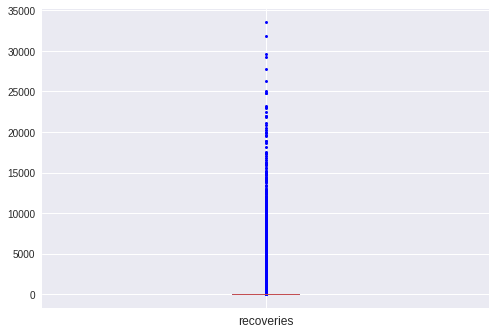

In [60]:
plt.show()

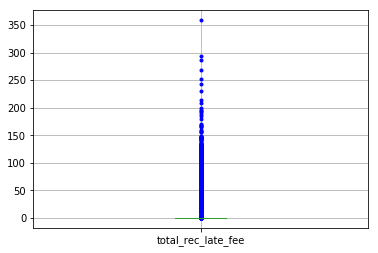

In [158]:
#out = np.exp(df['total_rec_late_fee'])
#print(out)
df2.boxplot(column='total_rec_late_fee', sym= '.b', whis=1.5)
plt.show()
#df.boxplot(column="total_rec_late_fee", sym = 'b.', whis=1.5)
#plt.show()

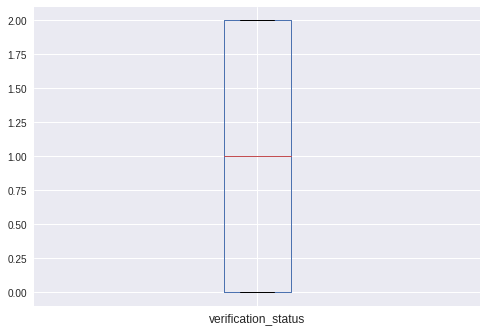

In [62]:
df.boxplot(column="verification_status")
plt.show()

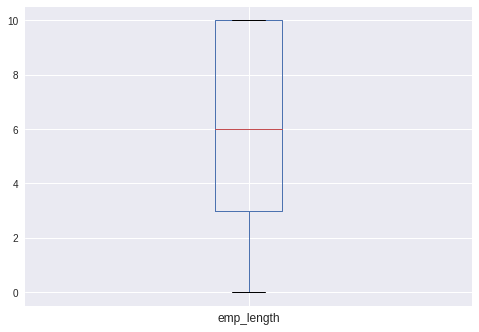

In [63]:
df.boxplot(column="emp_length", sym="b.", whis=1.5)
plt.show()

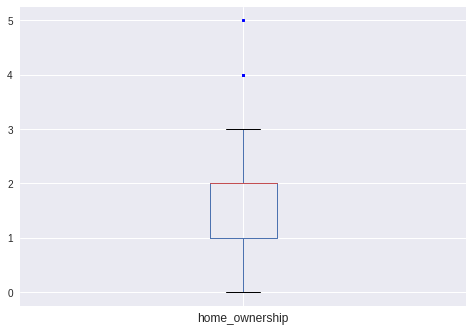

In [64]:
df.boxplot(column="home_ownership",sym="b.", whis=1.5)
plt.show()

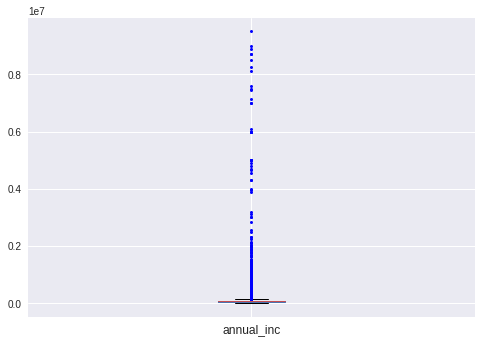

In [94]:
df2.boxplot(column="annual_inc" ,sym="b.")
plt.show()

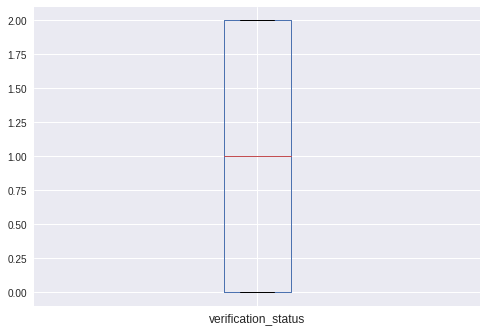

In [66]:
df.boxplot(column="verification_status", sym="b.")
plt.show()

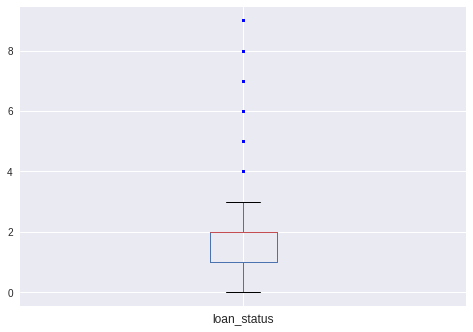

In [67]:
df.boxplot(column="loan_status",sym="b.")
plt.show()

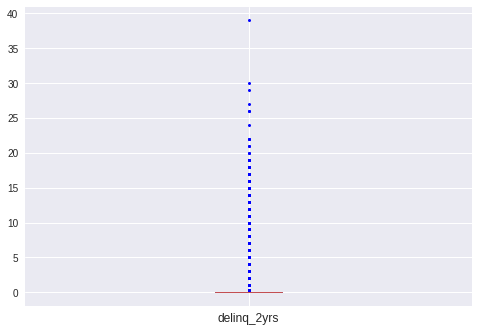

In [95]:
df2.boxplot(column="delinq_2yrs",sym="b.")
plt.show()

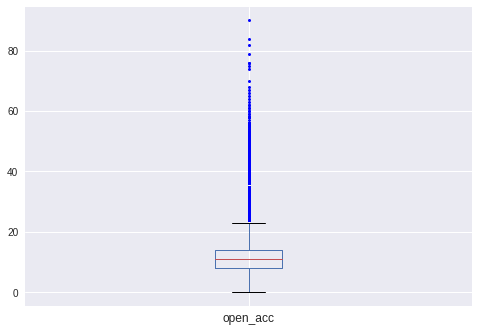

In [69]:
df.boxplot(column="open_acc",sym="b.")
plt.show()

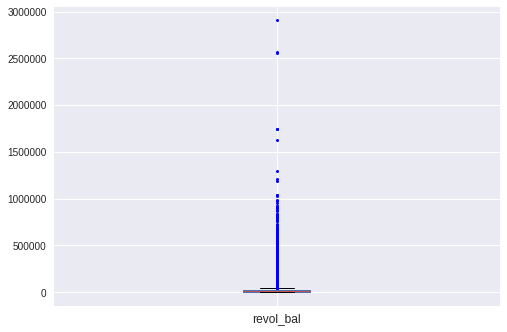

In [96]:
df2.boxplot(column="revol_bal", sym = 'b.', whis=1.5)
plt.show()

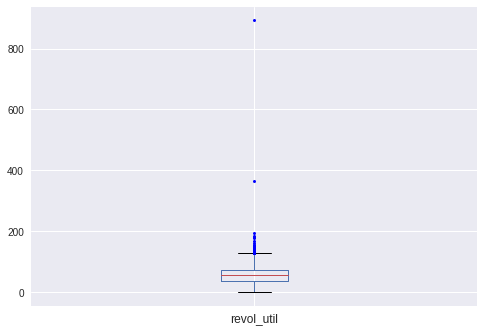

In [97]:
df2.boxplot(column="revol_util", sym = 'b.', whis=1.5)
plt.show()

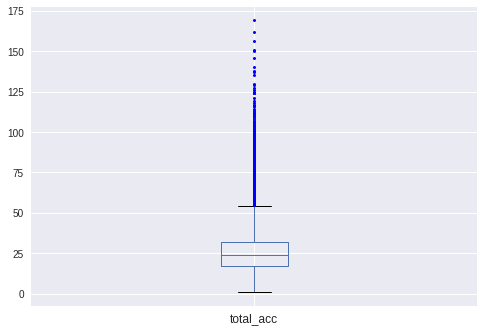

In [91]:
df2.boxplot(column="total_acc", sym = 'b.', whis=1.5)
plt.show()

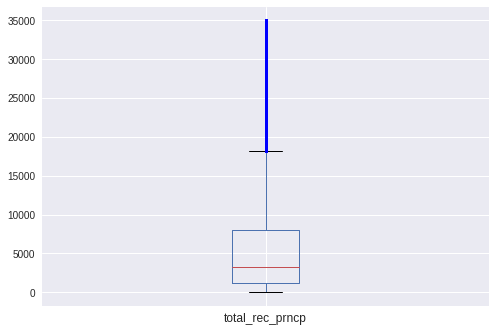

In [98]:
df2.boxplot(column="total_rec_prncp", sym = 'b.', whis=1.5)
plt.show()

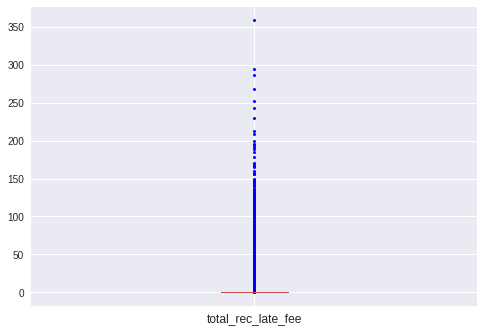

In [74]:
df.boxplot(column="total_rec_late_fee", sym = 'b.', whis=1.5)
plt.show()

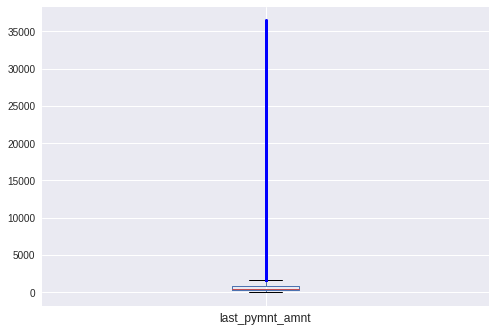

In [88]:
df2.boxplot(column="last_pymnt_amnt", sym = 'b.', whis=1.5)
plt.show()

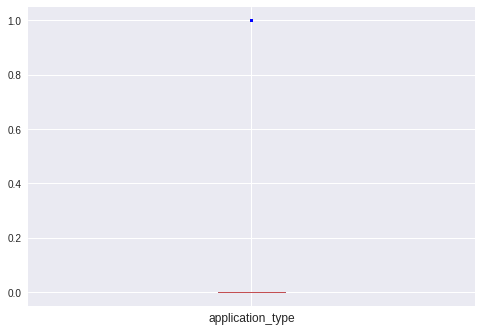

In [76]:
df.boxplot(column="application_type", sym = 'b.', whis=1.5)
plt.show()

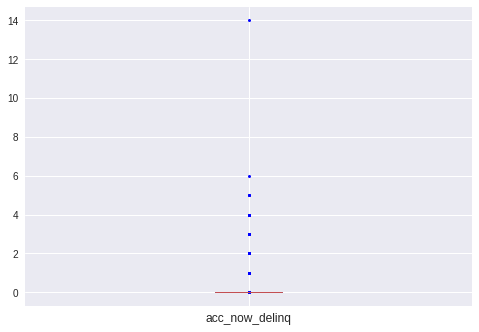

In [99]:
df2.boxplot(column="acc_now_delinq", sym = 'b.', whis=1.5)
plt.show()

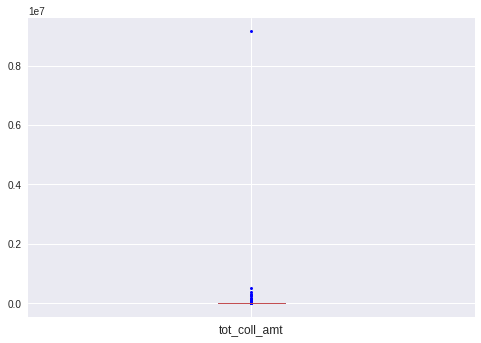

In [89]:
df2.boxplot(column="tot_coll_amt", sym = 'b.', whis=1.5)
plt.show()

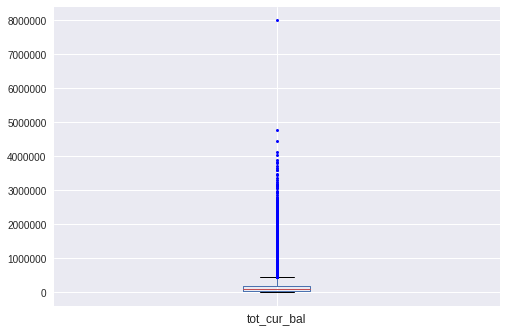

In [100]:
df2.boxplot(column="tot_cur_bal", sym = 'b.', whis=1.5)
plt.show()

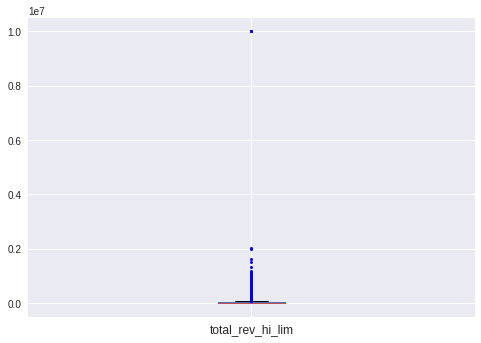

In [80]:
df.boxplot(column="total_rev_hi_lim", sym = 'b.', whis=1.5)
plt.show()

# Estadistica descriptiva de cada varible

In [81]:
for i in df.columns:
    print(i,"\n", df[i].describe())
    print("Rango",max(df[i])-min(df[i]))
    print("Varianza",np.var(df[i]))

loan_amnt 
 count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64
Rango 34500.0
Varianza 71156831.0134
funded_amnt 
 count    887379.000000
mean      14741.877625
std        8429.897657
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64
Rango 34500.0
Varianza 71063094.4206
term 
 count    887379.000000
mean          0.300045
std           0.458278
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: term, dtype: float64
Rango 1
Varianza 0.210018163794
installment 
 count    887379.000000
mean        436.717127
std         244.186593
min          15.670000
25%         260.705000
50%         382.550000
75%         572.600000
max        1445.460000
Name: installment,

# Imputando valores perdidos 

In [94]:
def removena(df):
    for i in df.columns:
        if df[i].isnull().any().any():
            df[i].fillna(df[i].mean(), inplace=True)
    return df


In [95]:
removena(df)[:1]

,loan_amnt,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,delinq_2yrs,...,total_acc,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,0,162.87,10.0,1,24000.0,0,0,0.0,...,9.0,5000.0,0.0,0.0,171.62,0,0.0,225.70261,139458.189336,32068.620045


In [2]:
import csv

#new_loan=removena(df)
#df.to_csv('new_loan.csv',index=False)
df2 = pd.read_csv("new_loan.csv")

# Se aplica logaritmo natural a variables de dinero. 
## Los valores en 0 se convirtieron a 1 para poder aplicar el logaritmo 

In [12]:

columnas_dinero = ["installment","recoveries","total_rec_late_fee",
            "annual_inc","revol_bal","total_rec_prncp",
            "last_pymnt_amnt","tot_cur_bal","total_rev_hi_lim",
            "delinq_2yrs","acc_now_delinq"] 

for i in df2[columnas_dinero]:
            df2[i].replace(0.0, 1,inplace=True)
            df2[i]=np.log(df2[i])       

# Imputando Valores Extremos

In [13]:
import scipy.stats

def imputaExtremos(columnas,df):
    for i in df2[columnas]:
        df2[i] = scipy.stats.mstats.winsorize(df2[i],limits=0.05)


columnas = ["installment","recoveries","total_rec_late_fee",
            "annual_inc","revol_bal","total_rec_prncp",
            "last_pymnt_amnt","tot_cur_bal","total_rev_hi_lim",
            "delinq_2yrs","revol_util","tot_coll_amt",
            "acc_now_delinq"] 

imputaExtremos(columnas, df2)

In [14]:
df2[:10]

,loan_amnt,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,delinq_2yrs,...,total_acc,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,0,5.092952,10.0,1,10.239960,0,0,0.0,...,9.0,8.517193,0.0,0.0,5.145283,0,0.0,225.70261,11.84552,10.375633
1,2500.0,2500.0,1,4.790986,0.0,1,10.308953,1,1,0.0,...,4.0,6.123501,0.0,0.0,4.784654,0,0.0,225.70261,11.84552,10.375633
2,2400.0,2400.0,0,4.790986,10.0,1,10.239960,2,0,0.0,...,10.0,7.783224,0.0,0.0,6.476834,0,0.0,225.70261,11.84552,10.375633
3,10000.0,10000.0,0,5.826914,10.0,1,10.803649,1,0,0.0,...,37.0,9.210340,0.0,0.0,5.879079,0,0.0,225.70261,11.84552,10.375633
4,3000.0,3000.0,1,4.790986,1.0,1,11.289782,1,2,0.0,...,38.0,7.711146,0.0,0.0,4.581594,0,0.0,225.70261,11.84552,10.375633
5,5000.0,5000.0,0,5.052800,3.0,1,10.491274,1,0,0.0,...,12.0,8.517193,0.0,0.0,5.081591,0,0.0,225.70261,11.84552,10.375633
6,7000.0,7000.0,1,5.136269,8.0,1,10.757988,2,2,0.0,...,11.0,8.539121,0.0,0.0,5.136269,0,0.0,225.70261,11.84552,10.375633
7,3000.0,3000.0,0,4.790986,9.0,1,10.778956,1,0,0.0,...,4.0,8.006368,0.0,0.0,4.712589,0,0.0,225.70261,11.84552,10.375633
8,5600.0,5600.0,1,5.026443,4.0,0,10.596635,1,1,0.0,...,13.0,5.417566,0.0,0.0,5.026443,0,0.0,225.70261,11.84552,10.375633
9,5375.0,5375.0,1,4.799503,0.0,1,10.239960,0,1,0.0,...,3.0,6.512458,0.0,0.0,4.799503,0,0.0,225.70261,11.84552,10.375633


### Eliminación de tres variables más.
Se eliminaron las columnas 'total_rec_late_fee','recoveries','acc_now_delinq' porque no aportaban información en la matriz de corrrelación. 

In [15]:
list_df2=['total_rec_late_fee','recoveries','acc_now_delinq']
for i in list_df2:
    del df2[i]

In [16]:
df2[:5]

,loan_amnt,funded_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,total_rec_prncp,last_pymnt_amnt,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,0,5.092952,10.0,1,10.239960,0,0,0.0,3.0,9.521348,83.7,9.0,8.517193,5.145283,0,225.70261,11.84552,10.375633
1,2500.0,2500.0,1,4.790986,0.0,1,10.308953,1,1,0.0,3.0,7.616284,13.9,4.0,6.123501,4.784654,0,225.70261,11.84552,10.375633
2,2400.0,2400.0,0,4.790986,10.0,1,10.239960,2,0,0.0,2.0,7.991592,92.5,10.0,7.783224,6.476834,0,225.70261,11.84552,10.375633
3,10000.0,10000.0,0,5.826914,10.0,1,10.803649,1,0,0.0,10.0,8.630165,21.0,37.0,9.210340,5.879079,0,225.70261,11.84552,10.375633
4,3000.0,3000.0,1,4.790986,1.0,1,11.289782,1,2,0.0,15.0,10.232180,53.9,38.0,7.711146,4.581594,0,225.70261,11.84552,10.375633


### Gráficas de caja y bigotes, y de barras de las variables después de aplicárseles el logaritmo

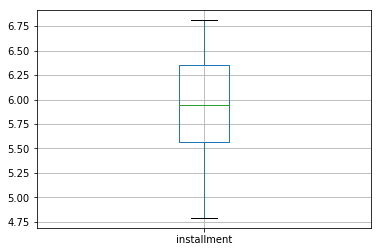

In [17]:

df2.boxplot(column="installment", sym = 'b.', whis=1.5)
plt.show()


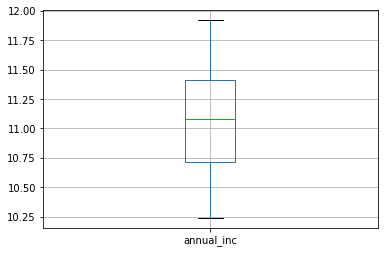

In [18]:

df2.boxplot(column="annual_inc", sym = 'b.', whis=1.5)
plt.show()


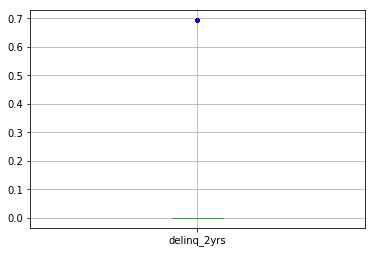

In [19]:
df2.boxplot(column="delinq_2yrs", sym = 'b.', whis=1.5)
plt.show()


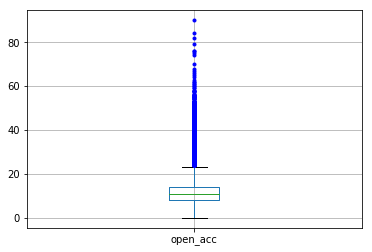

In [20]:
df2.boxplot(column="open_acc", sym = 'b.', whis=1.5)
plt.show()

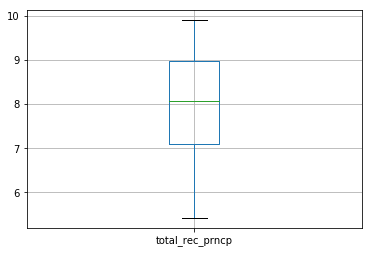

In [21]:
df2.boxplot(column="total_rec_prncp", sym = 'b.', whis=1.5)
plt.show()

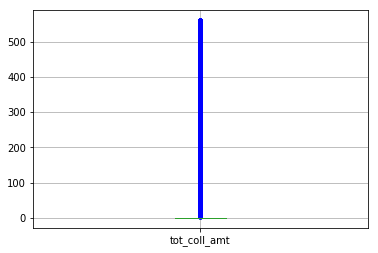

In [22]:
df2.boxplot(column="tot_coll_amt", sym = 'b.', whis=1.5)
plt.show()

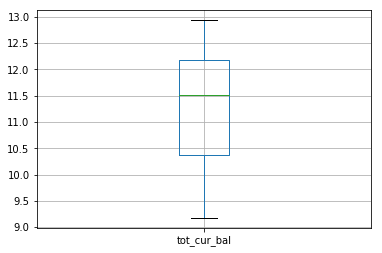

In [23]:
df2.boxplot(column="tot_cur_bal", sym = 'b.', whis=1.5)
plt.show()

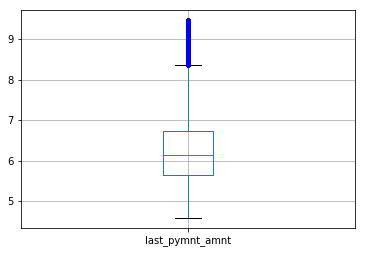

In [24]:
#df2['last_pymnt_amnt']
df2.boxplot(column="last_pymnt_amnt", sym = 'b.', whis=1.5)
plt.show()



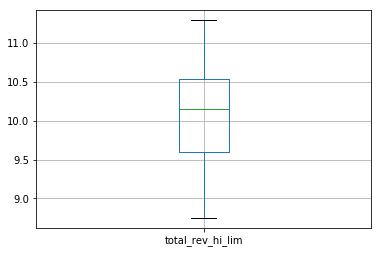

In [25]:
df2.boxplot(column="total_rev_hi_lim", sym = 'b.', whis=1.5)
plt.show()

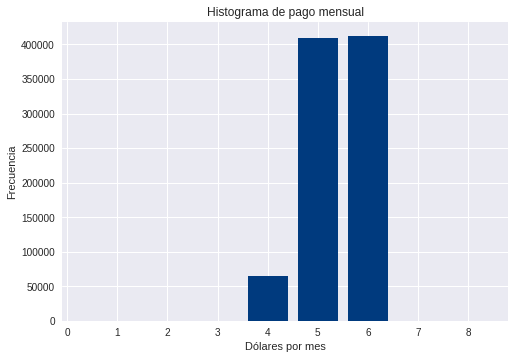

In [258]:
#df2['installment'][10:30]=np.log(df2['installment'][10:30])
#np.log(df2['installment']).describe()
df2['installment'].hist(bins=[0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0,6.0,7.0,8.0,9.0], rwidth=0.8, align='left', color='#003A7E')
plt.title('Histograma de pago mensual')
plt.ylabel('Frecuencia')
plt.xlabel('Dólares por mes')
plt.show()

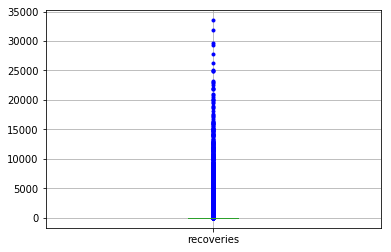

In [10]:
df2.boxplot(column="recoveries", sym = 'b.', whis=1.5)
plt.show()

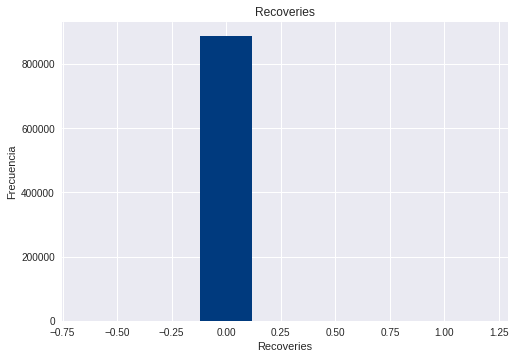

In [260]:
df2['recoveries'].hist(bins=[-0.5,-0.1,0,0.3,0.5,0.8,1.0,1.5], rwidth=0.8, align='left', color='#003A7E')
plt.title('Recoveries')
plt.ylabel('Frecuencia')
plt.xlabel('Recoveries')
plt.show()

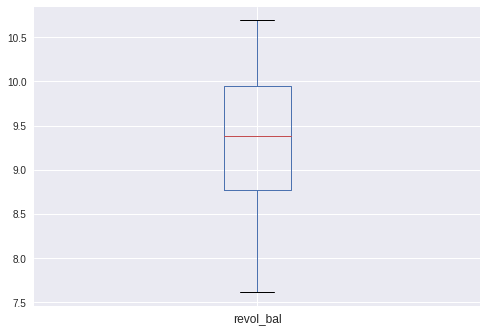

In [261]:
#df2['revol_bal']=np.log10(df2['revol_bal'])
#df2['installment'][:10]
#df2['revol_bal']
df2.boxplot(column="revol_bal", sym = 'b.', whis=1.5)
plt.show()

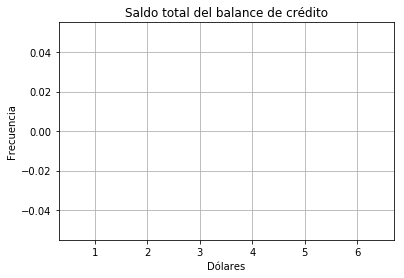

In [26]:
revol_util2=df2['revol_bal']
revol_util2.hist(bins=[1,2,3,4,5,6,7], rwidth=0.8, align='left', color='#003A7E')
plt.title('Saldo total del balance de crédito')
plt.ylabel('Frecuencia')
plt.xlabel('Dólares')
plt.show()
#df2['revol_bal'].describe()
#Al -inf se le susgtituyó por 1:
#df2['revol_bal'].replace(0.0, 1,inplace=True)

In [27]:
#import matplotlib as plot
plt.scatter(df2['last_pymnt_amnt'][:10000].index,df2['last_pymnt_amnt'][:10000])

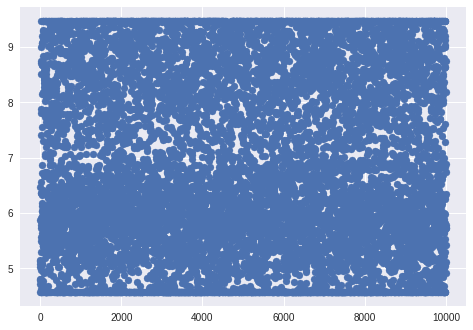

In [265]:
plt.show()

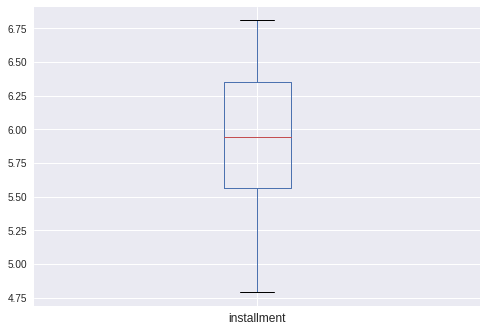

In [269]:
df2.boxplot(column='installment', sym = 'b.', whis=1.5)
plt.show()

### Calculando matriz de correlación con valores extremos imputados

In [22]:
corr2 = df2.corr()
sns.heatmap(corr2,square=True)

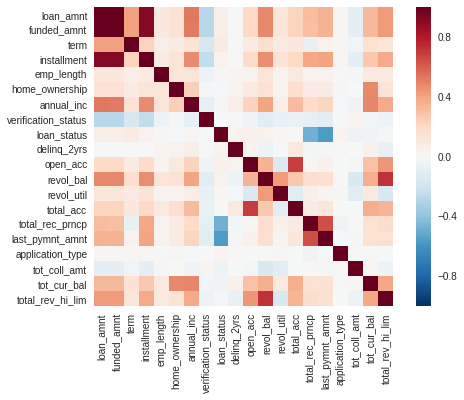

In [23]:
plt.show()

In [37]:
df2.plot(kind='scatter', y='total_acc', x='open_acc')

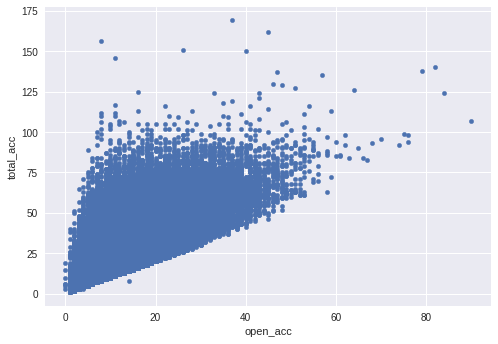

In [39]:
plt.show()

In [65]:
df2.plot(kind='scatter', y='loan_amnt', x='annual_inc')

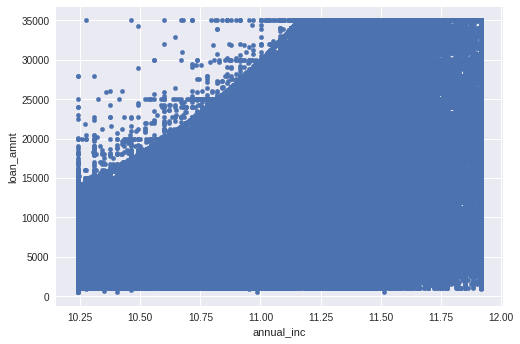

In [66]:
plt.show()

In [59]:
df2[:10000].plot(kind='scatter', x='revol_bal', y='total_rev_hi_lim')

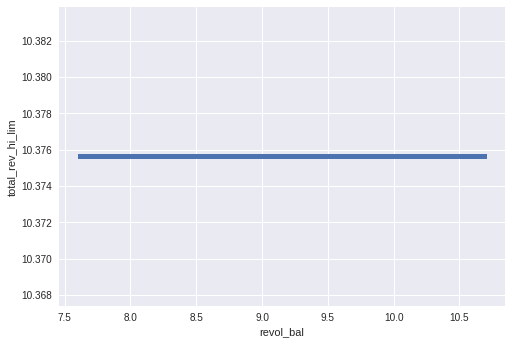

In [60]:
plt.show()

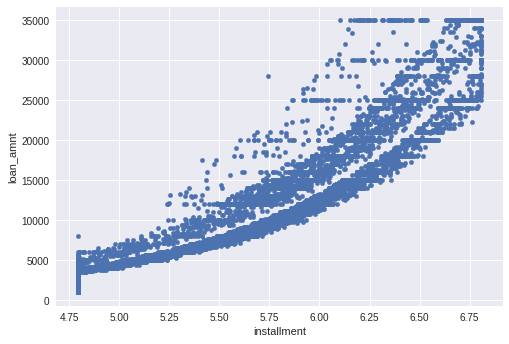

In [58]:
df2[:10000].plot(kind='scatter', y='loan_amnt', x='installment')
plt.show()

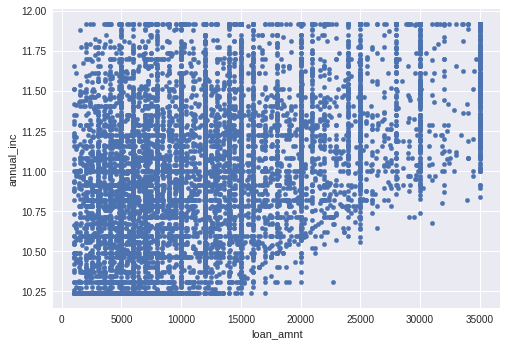

In [61]:
df2[:10000].plot(kind='scatter', x='loan_amnt', y='annual_inc')
plt.show()

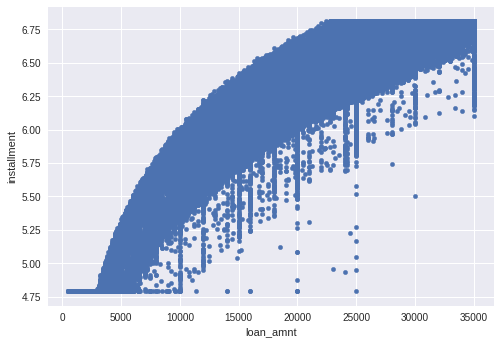

In [44]:
df2.plot(kind='scatter', y='installment', x='loan_amnt')
plt.show()

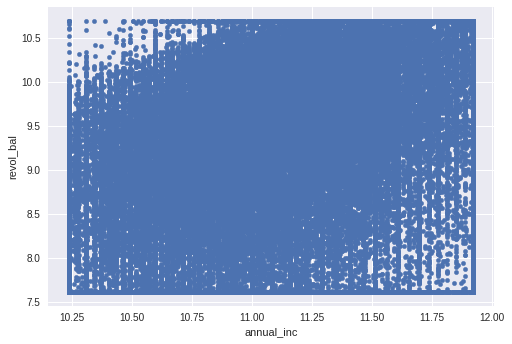

In [46]:
df2[:100000].plot(kind='scatter', x='annual_inc', y='revol_bal')
plt.show()

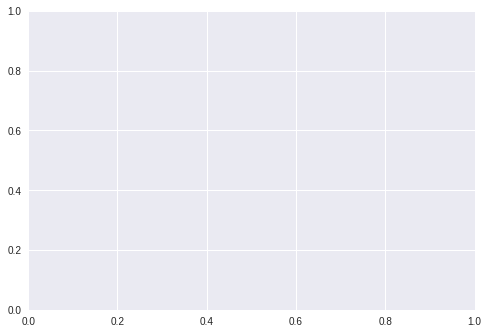

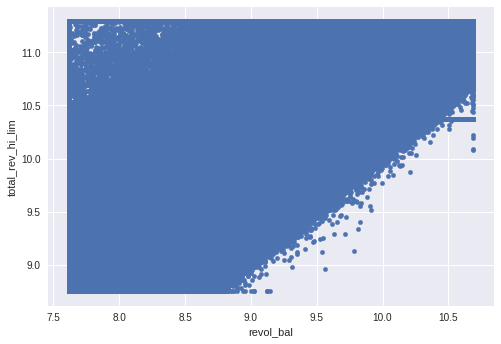

In [64]:
df2.plot(kind='scatter', x='revol_bal', y='total_rev_hi_lim')
plt.show()

In [99]:
df['total_rec_prncp'].describe()

count    887379.000000
mean       5757.706424
std        6625.441046
min           0.000000
25%        1200.570000
50%        3215.320000
75%        8000.000000
max       35000.030000
Name: total_rec_prncp, dtype: float64

In [237]:
df2['last_pymnt_amnt'].plot(kind='hist')

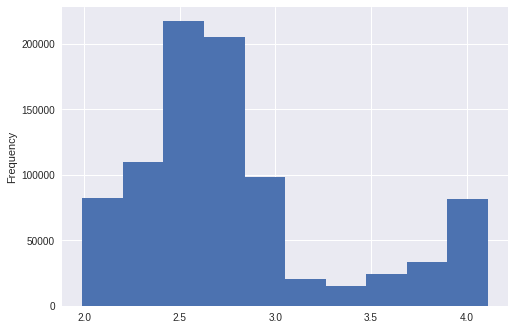

In [238]:
plt.show()

In [239]:
df2['last_pymnt_amnt'].describe()

count    887379.000000
mean          2.792689
std           0.562506
min           1.989761
25%           2.447422
50%           2.665375
75%           2.919729
max           4.111692
Name: last_pymnt_amnt, dtype: float64

# Matriz de Covarianza

In [48]:
np.cov(df2[:10000])

array([[  2350412.54333108,   1173428.69833624,   1123990.04968004, ...,
          1689576.83516967,   7066473.82926001,   6913742.38534063],
       [  1173428.69833624,    586512.62530318,    561705.14984297, ...,
           843817.34045028,   3525663.22516863,   3449531.73579949],
       [  1123990.04968004,    561705.14984297,    538254.81153565, ...,
           808357.4682461 ,   3376456.91861592,   3303453.55925088],
       ..., 
       [  1689576.83516967,    843817.34045028,    808357.4682461 , ...,
          1214764.97278767,   5078240.04734957,   4968480.06831656],
       [  7066473.82926001,   3525663.22516863,   3376456.91861592, ...,
          5078240.04734957,  21255741.15050342,  20796378.81280475],
       [  6913742.38534063,   3449531.73579949,   3303453.55925088, ...,
          4968480.06831656,  20796378.81280475,  20346977.053602  ]])

In [3]:
#df2.to_csv("loan_final.csv", index=False)
df2 = pd.read_csv("loan_final.csv")

In [69]:
!pip install CHAID



    100% |████████████████████████████████| 184kB 606kB/s ta 0:00:01
    100% |████████████████████████████████| 50.9MB 14kB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 809kB/s ta 0:00:011
  Running setup.py bdist_wheel for CHAID ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/1c/3d/d1/27d6737f9020be37ac11c1e0c21ac580f3887bc330b22c564a
  Running setup.py bdist_wheel for treelib ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/2b/87/2e/08246db71ef0a7090ce78d0e6639e1df53bf40de596949419e
  Running setup.py bdist_wheel for savReaderWriter ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/ee/9f/ef/b1f514616baa419d597030dd91c2bedfe53c9c5f529b044957
Successfully built CHAID treelib savReaderWriter


In [4]:
from CHAID import Tree


In [71]:
ndarr = np.array(([1, 2, 3] * 5) + ([2, 2, 3] * 5)).reshape(10, 3)
df = pd.DataFrame(ndarr)
df.columns = ['a', 'b', 'c']
arr = np.array(([1] * 5) + ([2] * 5))
df['d'] = arr

In [72]:
df

,a,b,c,d
0,1,2,3,1
1,1,2,3,1
2,1,2,3,1
3,1,2,3,1
4,1,2,3,1
5,2,2,3,2
6,2,2,3,2
7,2,2,3,2
8,2,2,3,2
9,2,2,3,2


In [73]:
independent_variable_columns = ['a', 'b', 'c']
dep_variable = 'd'

In [74]:
tree = Tree(ndarr, arr, split_titles=['a', 'b', 'c'], min_child_node_size=5)


In [75]:
tree.print_tree()

b'([], {1: 5, 2: 5}, (a, p=0.001565402258002549, score=10.0, groups=[[1], [2]]), dof=1))\n\xe2\x94\x9c\xe2\x94\x80\xe2\x94\x80 ([1], {1: 5, 2: 0}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached)\n\xe2\x94\x94\xe2\x94\x80\xe2\x94\x80 ([2], {1: 0, 2: 5}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached)\n'


In [76]:
tree.to_tree()

In [77]:
first_node = tree.tree_store[0]


In [78]:
first_node

([], {1: 5, 2: 5}, (a, p=0.001565402258002549, score=10.0, groups=[[1], [2]]), dof=1))

In [79]:
first_node.members

{1: 5, 2: 5}

In [80]:
first_node.split.p

0.001565402258002549

In [81]:
first_node.split.score

10.0

In [82]:
df2.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_prncp', 'last_pymnt_amnt', 'application_type',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [20]:
#a=df2[['loan_amnt', 'funded_amnt', 'term', 'installment', 'emp_length',
#       'home_ownership', 'annual_inc', 'verification_status',
#       'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
#       'total_rec_prncp', 'last_pymnt_amnt', 'application_type',
#       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']][:100000]

a=df2[['loan_amnt','term', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'delinq_2yrs', 'open_acc','total_acc',
       'total_rec_prncp', 'last_pymnt_amnt', 'application_type']][:500]

a.as_matrix()

array([[  5.00000000e+03,   0.00000000e+00,   5.09295234e+00, ...,
          8.51719319e+00,   5.14528273e+00,   0.00000000e+00],
       [  2.50000000e+03,   1.00000000e+00,   4.79098563e+00, ...,
          6.12350107e+00,   4.78465439e+00,   0.00000000e+00],
       [  2.40000000e+03,   0.00000000e+00,   4.79098563e+00, ...,
          7.78322402e+00,   6.47683389e+00,   0.00000000e+00],
       ..., 
       [  1.05250000e+04,   0.00000000e+00,   5.79706029e+00, ...,
          9.26150866e+00,   7.47088489e+00,   0.00000000e+00],
       [  7.20000000e+03,   0.00000000e+00,   5.53334996e+00, ...,
          8.88183631e+00,   5.57972983e+00,   0.00000000e+00],
       [  1.85000000e+04,   1.00000000e+00,   5.82965125e+00, ...,
          9.66618169e+00,   8.90581864e+00,   0.00000000e+00]])

In [21]:
b=df2['loan_status'][:500]
b.as_matrix()

array([0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1,

In [22]:
tree = Tree(a.as_matrix(),b.as_matrix(),split_titles=['loan_amnt','term', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status','loan_status',
       'delinq_2yrs', 'open_acc','total_acc',
       'total_rec_prncp', 'last_pymnt_amnt', 'application_type'],min_child_node_size=5)

In [ ]:
import sys,time
tree.print_tree()

In [14]:
print(tree.tree_store[0].split.column)

None
